In [12]:
import sys
from google.colab import drive
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import csv
import os
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils as np_utils
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
fp='/content/drive/MyDrive/data分析/Mediapipe/csvtraintotal.csv'
#files=os.listdir(fp)
df=pd.read_csv(fp)

In [3]:
df

,0_x,0_y,0_z,100_x,100_y,100_z,101_x,101_y,101_z,102_x,102_y,102_z,103_x,103_y,103_z,104_x,104_y,104_z,105_x,105_y,105_z,106_x,106_y,106_z,107_x,107_y,107_z,108_x,108_y,108_z,109_x,109_y,109_z,10_x,10_y,10_z,110_x,110_y,110_z,111_x,...,89_y,89_z,8_x,8_y,8_z,90_x,90_y,90_z,91_x,91_y,91_z,92_x,92_y,92_z,93_x,93_y,93_z,94_x,94_y,94_z,95_x,95_y,95_z,96_x,96_y,96_z,97_x,97_y,97_z,98_x,98_y,98_z,99_x,99_y,99_z,9_x,9_y,9_z,Unnamed: 0,correct
0,0.470799,0.682127,-0.080930,0.339680,0.500239,0.001424,0.296106,0.526307,0.013302,0.361964,0.573378,-0.044539,0.191371,0.194533,0.097439,0.212881,0.238277,0.052467,0.235472,0.285108,0.014390,0.385465,0.781734,-0.007592,0.357043,0.274428,-0.037246,0.340158,0.202853,-0.015436,0.321931,0.130519,0.006262,0.412151,0.113719,-0.008327,0.253681,0.442930,0.056188,0.192371,...,0.737290,-0.025478,0.434136,0.314108,-0.042840,0.398939,0.746655,-0.030840,0.393578,0.757806,-0.026364,0.351389,0.677704,-0.021752,0.173446,0.579080,0.323007,0.459225,0.599125,-0.099350,0.399182,0.731124,-0.006322,0.391899,0.733549,-0.009079,0.424361,0.611631,-0.070455,0.380985,0.606789,-0.037339,0.419343,0.605716,-0.069694,0.428503,0.269363,-0.045183,0,0
1,0.469567,0.799870,-0.017644,0.348688,0.513593,-0.045884,0.290292,0.530457,-0.030681,0.352485,0.633756,-0.053042,0.209036,0.094351,-0.139540,0.239477,0.182606,-0.157115,0.265887,0.273181,-0.170042,0.327009,0.827892,0.100199,0.425728,0.307515,-0.205852,0.416682,0.194925,-0.227324,0.406638,0.083548,-0.242068,0.529422,0.090397,-0.250223,0.250477,0.403172,-0.039577,0.157762,...,0.798798,0.062630,0.508284,0.366295,-0.177562,0.354303,0.805612,0.062696,0.345936,0.813267,0.070353,0.316791,0.738285,0.024206,0.072487,0.447892,0.333080,0.477093,0.723211,-0.088660,0.350487,0.789399,0.078221,0.343767,0.790928,0.078075,0.422094,0.713270,-0.049938,0.363159,0.677821,-0.022846,0.415244,0.704734,-0.056130,0.513777,0.319253,-0.206077,3,0
2,0.711111,0.717369,-0.049849,0.492522,0.549239,-0.050151,0.450243,0.587217,-0.045329,0.539467,0.635224,-0.070256,0.223377,0.272958,-0.083552,0.283708,0.326970,-0.109453,0.340850,0.387407,-0.131149,0.603942,0.857271,0.056888,0.490310,0.351051,-0.153234,0.437256,0.259501,-0.155545,0.385495,0.177831,-0.154630,0.488445,0.137941,-0.152786,0.367887,0.503332,-0.038149,0.294357,...,0.822683,0.029002,0.578697,0.367118,-0.129393,0.622796,0.834589,0.028758,0.616266,0.845286,0.035142,0.550873,0.747057,-0.012852,0.228344,0.659144,0.268810,0.688327,0.643454,-0.101639,0.612709,0.811374,0.041834,0.604680,0.816566,0.040922,0.633793,0.664174,-0.071061,0.566127,0.666339,-0.046193,0.624728,0.659804,-0.075197,0.565757,0.328598,-0.146556,4,0
3,0.483527,0.809326,-0.011760,0.344644,0.581638,-0.033273,0.295061,0.597420,-0.013657,0.360514,0.680113,-0.041067,0.189817,0.220668,-0.127457,0.215817,0.290792,-0.141683,0.238612,0.363065,-0.150872,0.378712,0.844660,0.111848,0.382644,0.402066,-0.192089,0.370748,0.305048,-0.214974,0.355163,0.208554,-0.232295,0.464029,0.211647,-0.244948,0.247434,0.488584,-0.026676,0.175191,...,0.820019,0.071907,0.465131,0.452157,-0.168719,0.398679,0.827414,0.072785,0.392145,0.834791,0.081655,0.346620,0.765851,0.036317,0.139569,0.514248,0.319508,0.475415,0.749521,-0.076082,0.396229,0.811944,0.086949,0.389692,0.813754,0.087736,0.431490,0.742306,-0.039092,0.377746,0.715237,-0.014063,0.424486,0.735751,-0.044687,0.464442,0.411362,-0.195280,5,0
4,0.061688,0.692855,-0.050553,0.088094,0.485313,0.096132,0.066970,0.506532,0.140697,0.043108,0.566985,0.046351,0.085716,0.166476,0.243169,0.064643,0.223619,0.188716,0.040649,0.289942,0.143320,0.082358,0.776436,0.096337,0.084009,0.307915,0.002832,0.094099,0.206533,0.022408,0.109919,0.122637,0.042296,0.163256,0.115645,-0.043075,0.080999,0.401563,0.211497,0.079665,...,0.740983,0.055285,0.131059,0.346348,-0.051665,0.071792,0.746798,0.055567,0.069141,0.755517,0.065676,0.047076,0.671389,0.082513,0.229300,0.530411,0.530587,0.052978,0.619554,-0.066292,0.085567,0.738580,0.082343,0.080121,0.739309,0.081224,0.058816,0.624059,-0.017864,0.052244

In [4]:
df.drop(columns=df.columns[[-2]],axis=1)

,0_x,0_y,0_z,100_x,100_y,100_z,101_x,101_y,101_z,102_x,102_y,102_z,103_x,103_y,103_z,104_x,104_y,104_z,105_x,105_y,105_z,106_x,106_y,106_z,107_x,107_y,107_z,108_x,108_y,108_z,109_x,109_y,109_z,10_x,10_y,10_z,110_x,110_y,110_z,111_x,...,89_x,89_y,89_z,8_x,8_y,8_z,90_x,90_y,90_z,91_x,91_y,91_z,92_x,92_y,92_z,93_x,93_y,93_z,94_x,94_y,94_z,95_x,95_y,95_z,96_x,96_y,96_z,97_x,97_y,97_z,98_x,98_y,98_z,99_x,99_y,99_z,9_x,9_y,9_z,correct
0,0.470799,0.682127,-0.080930,0.339680,0.500239,0.001424,0.296106,0.526307,0.013302,0.361964,0.573378,-0.044539,0.191371,0.194533,0.097439,0.212881,0.238277,0.052467,0.235472,0.285108,0.014390,0.385465,0.781734,-0.007592,0.357043,0.274428,-0.037246,0.340158,0.202853,-0.015436,0.321931,0.130519,0.006262,0.412151,0.113719,-0.008327,0.253681,0.442930,0.056188,0.192371,...,0.405580,0.737290,-0.025478,0.434136,0.314108,-0.042840,0.398939,0.746655,-0.030840,0.393578,0.757806,-0.026364,0.351389,0.677704,-0.021752,0.173446,0.579080,0.323007,0.459225,0.599125,-0.099350,0.399182,0.731124,-0.006322,0.391899,0.733549,-0.009079,0.424361,0.611631,-0.070455,0.380985,0.606789,-0.037339,0.419343,0.605716,-0.069694,0.428503,0.269363,-0.045183,0
1,0.469567,0.799870,-0.017644,0.348688,0.513593,-0.045884,0.290292,0.530457,-0.030681,0.352485,0.633756,-0.053042,0.209036,0.094351,-0.139540,0.239477,0.182606,-0.157115,0.265887,0.273181,-0.170042,0.327009,0.827892,0.100199,0.425728,0.307515,-0.205852,0.416682,0.194925,-0.227324,0.406638,0.083548,-0.242068,0.529422,0.090397,-0.250223,0.250477,0.403172,-0.039577,0.157762,...,0.362563,0.798798,0.062630,0.508284,0.366295,-0.177562,0.354303,0.805612,0.062696,0.345936,0.813267,0.070353,0.316791,0.738285,0.024206,0.072487,0.447892,0.333080,0.477093,0.723211,-0.088660,0.350487,0.789399,0.078221,0.343767,0.790928,0.078075,0.422094,0.713270,-0.049938,0.363159,0.677821,-0.022846,0.415244,0.704734,-0.056130,0.513777,0.319253,-0.206077,0
2,0.711111,0.717369,-0.049849,0.492522,0.549239,-0.050151,0.450243,0.587217,-0.045329,0.539467,0.635224,-0.070256,0.223377,0.272958,-0.083552,0.283708,0.326970,-0.109453,0.340850,0.387407,-0.131149,0.603942,0.857271,0.056888,0.490310,0.351051,-0.153234,0.437256,0.259501,-0.155545,0.385495,0.177831,-0.154630,0.488445,0.137941,-0.152786,0.367887,0.503332,-0.038149,0.294357,...,0.629462,0.822683,0.029002,0.578697,0.367118,-0.129393,0.622796,0.834589,0.028758,0.616266,0.845286,0.035142,0.550873,0.747057,-0.012852,0.228344,0.659144,0.268810,0.688327,0.643454,-0.101639,0.612709,0.811374,0.041834,0.604680,0.816566,0.040922,0.633793,0.664174,-0.071061,0.566127,0.666339,-0.046193,0.624728,0.659804,-0.075197,0.565757,0.328598,-0.146556,0
3,0.483527,0.809326,-0.011760,0.344644,0.581638,-0.033273,0.295061,0.597420,-0.013657,0.360514,0.680113,-0.041067,0.189817,0.220668,-0.127457,0.215817,0.290792,-0.141683,0.238612,0.363065,-0.150872,0.378712,0.844660,0.111848,0.382644,0.402066,-0.192089,0.370748,0.305048,-0.214974,0.355163,0.208554,-0.232295,0.464029,0.211647,-0.244948,0.247434,0.488584,-0.026676,0.175191,...,0.406199,0.820019,0.071907,0.465131,0.452157,-0.168719,0.398679,0.827414,0.072785,0.392145,0.834791,0.081655,0.346620,0.765851,0.036317,0.139569,0.514248,0.319508,0.475415,0.749521,-0.076082,0.396229,0.811944,0.086949,0.389692,0.813754,0.087736,0.431490,0.742306,-0.039092,0.377746,0.715237,-0.014063,0.424486,0.735751,-0.044687,0.464442,0.411362,-0.195280,0
4,0.061688,0.692855,-0.050553,0.088094,0.485313,0.096132,0.066970,0.506532,0.140697,0.043108,0.566985,0.046351,0.085716,0.166476,0.243169,0.064643,0.223619,0.188716,0.040649,0.289942,0.143320,0.082358,0.776436,0.096337,0.084009,0.307915,0.002832,0.094099,0.206533,0.022408,0.109919,0.122637,0.042296,0.163256,0.115645,-0.043075,0.080999,0.401563,0.211497,0.079665,...,0.077165,0.740983,0.055285,0.131059,0.346348,-0.051665,0.071792,0.746798,0.055567,0.069141,0.755517,0.065676,0.047076,0.671389,0.082513,0.229300,0.530411,0.530587,0.052978,0.619554,-0.066292,0.085567,0.738580,0.082343,0.080121,0.739309,0.081224,0.058

In [14]:
x=DataFrame(df.drop("correct",axis=1))
y=DataFrame(df["correct"])
#説明変数・目的変数をそれぞれ訓練データ・テストデータに分割
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)
#データの整形
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

y_train = np_utils.to_categorical(y_train,7)
y_test = np_utils.to_categorical(y_test,7)

In [23]:
#ニューラルネットワークの実装①
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(1405,)))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(1405,)))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu', input_shape=(1405,)))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                70300     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 7)                

In [25]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=1e-4)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train,batch_size=200,epochs=1000,verbose=1,validation_data=(x_test, y_test))

Epoch 1/1000
391/391 [==============================] - 4s 8ms/step - loss: 82.3857 - accuracy: 0.2456 - val_loss: 4.1832 - val_accuracy: 0.3258
Epoch 2/1000
391/391 [==============================] - 3s 7ms/step - loss: 16.9791 - accuracy: 0.2735 - val_loss: 1.9223 - val_accuracy: 0.3134
Epoch 3/1000
391/391 [==============================] - 3s 7ms/step - loss: 6.6713 - accuracy: 0.2731 - val_loss: 1.4251 - val_accuracy: 0.3107
Epoch 4/1000
391/391 [==============================] - 2s 6ms/step - loss: 3.3640 - accuracy: 0.2778 - val_loss: 1.4516 - val_accuracy: 0.3273
Epoch 5/1000
391/391 [==============================] - 3s 7ms/step - loss: 2.1197 - accuracy: 0.2837 - val_loss: 1.4579 - val_accuracy: 0.3175
Epoch 6/1000
391/391 [==============================] - 3s 7ms/step - loss: 1.7067 - accuracy: 0.2978 - val_loss: 1.4302 - val_accuracy: 0.3251
Epoch 7/1000
391/391 [==============================] - 3s 6ms/step - loss: 1.5579 - accuracy: 0.3027 - val_loss: 1.4106 - val_accurac

In [27]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

129/129 [==============================] - 0s 2ms/step - loss: 0.9236 - accuracy: 0.6433


Test loss: 0.9235625863075256
Test accuracy: 0.6433089971542358


In [33]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()


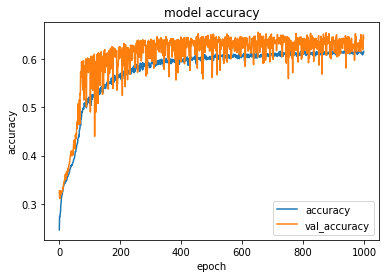

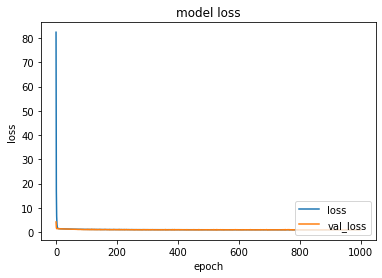

In [34]:
# 学習履歴をプロット
plot_history(history)
